In [1]:
import random
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

ROOT_DIR = '..'
sys.path.append(ROOT_DIR)

In [3]:
from utils.evolution_functions import next_generation, plot_n_pt, plot_pt_qt, plot_n_pt_qt, plot_n_p2_q2_pq, plot_all
from utils.statistic_utils import run_chi_squared_test

# Implementação 1

1. Avaliar os efeitos nas frequências gênicas de uma
população muito grande com mutação recorrente
unidirecional para um loco com dois alelos

2. Simular diferentes valores iniciais de p

3. Simular com u = 1.0e-4
    - Simular 5 ordens de grandeza diferentes para
valores de u

Responder e demonstrar:

- Ocorre estagnação? Se sim, em quantas gerações?

- Ocorre perda da variabilidade genética? Se sim, em
quantas gerações?

- Mesmo agindo isoladamente, e em uma taxa
pequena, a mutação causou alteração significativa
nas frequências?

- A população está em EHW? Até quantas gerações?
    * Como testar o EHW?

Responder às perguntas (variar u, p, etc)

* Teste do CHI² para os valores das frequências dos
genótipos observados e esperados (segundo o EHW)

* Gráficos
    - p, q pela geração T
    - frequência de AA, AB, BB pela geração T
    - CHI² pela geração T

In [5]:
def generate_random_samples(p, q, N):
    values = [p**2 * N, 2*p*q*N, q**2 * N]
    return values

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 0.633386794340814, Final q: 0.3666132056572665


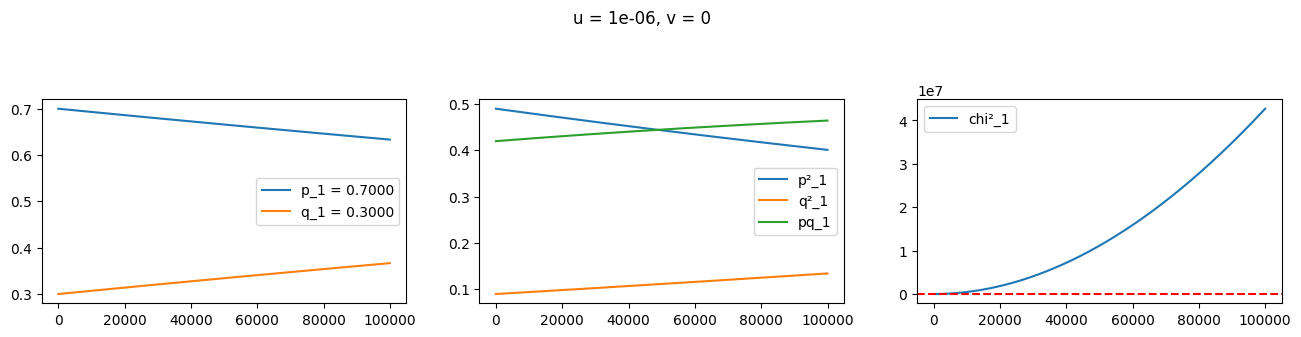

 p inicial, 0.6, q inicial, 0.4
Final p: 0.5429029665778397, Final q: 0.457097033420513


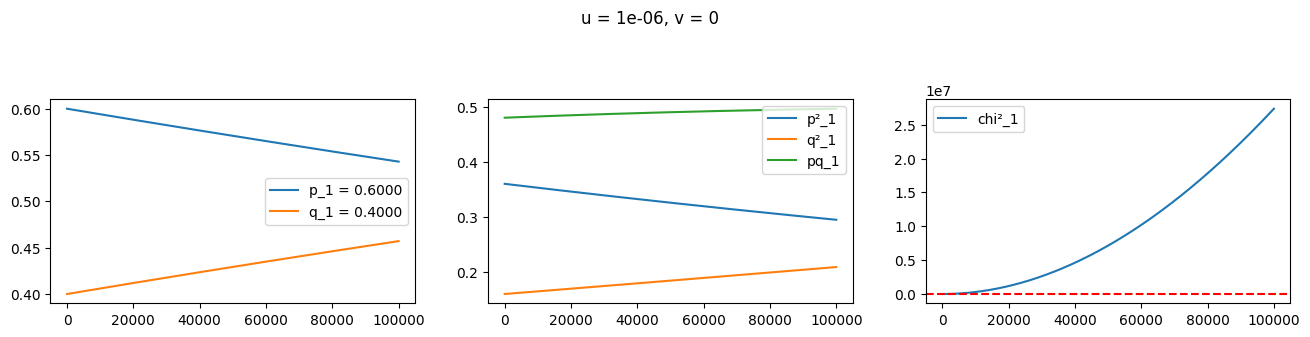

 p inicial, 0.5, q inicial, 0.5
Final p: 0.45241913881487644, Final q: 0.5475808611837709


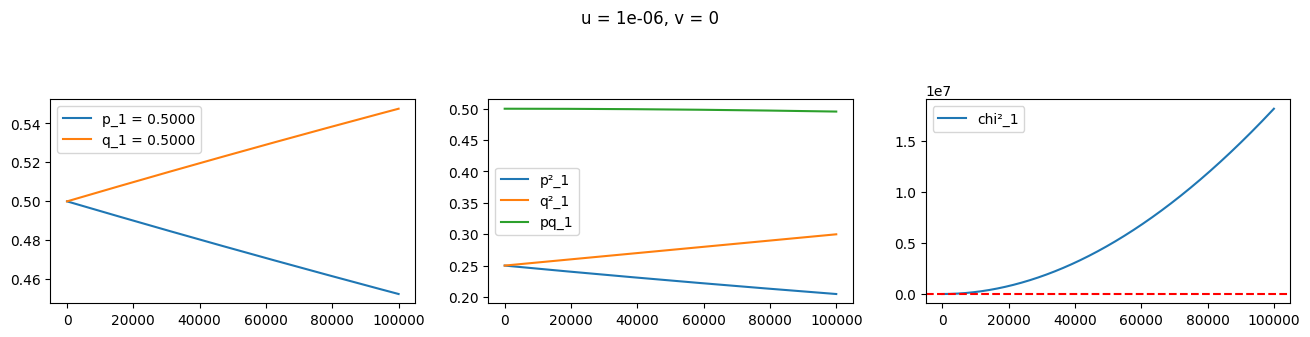

 p inicial, 0.8, q inicial, 0.19999999999999996
Final p: 0.7238706221037726, Final q: 0.27612937789402026


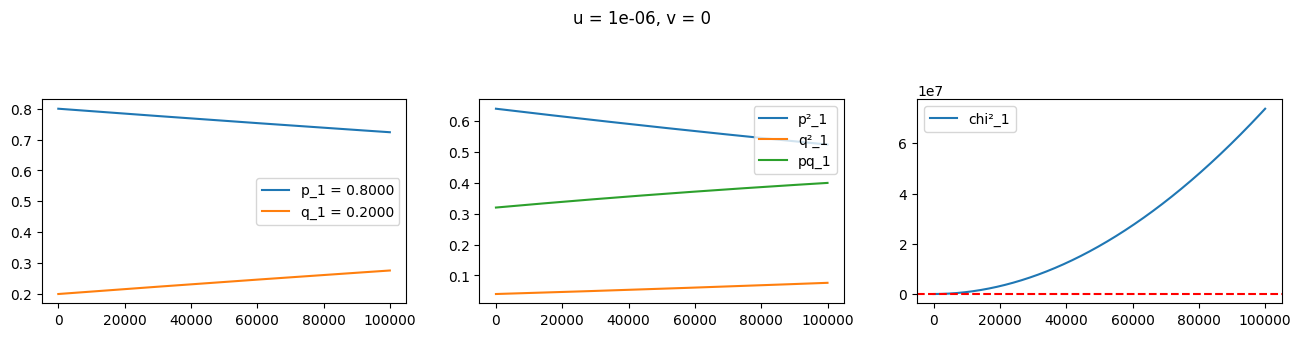

 p inicial, 0.4, q inicial, 0.6
Final p: 0.3619353110518863, Final q: 0.6380646889470095


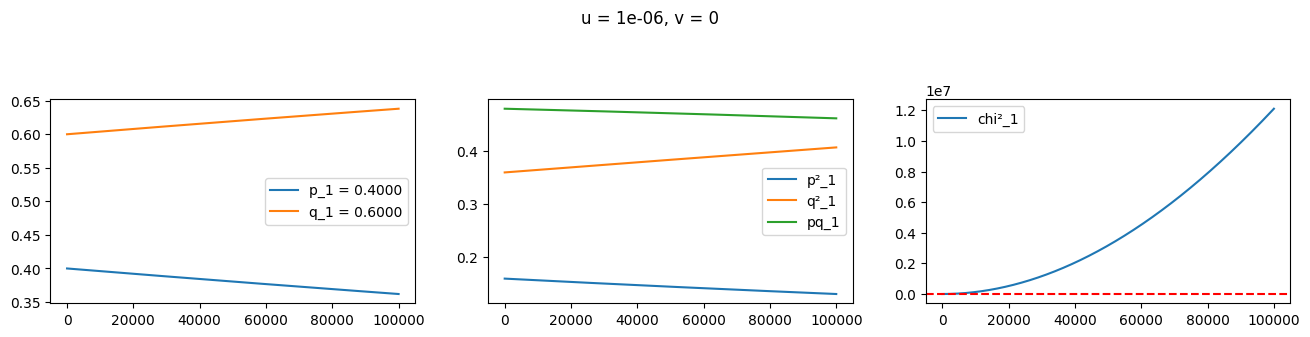

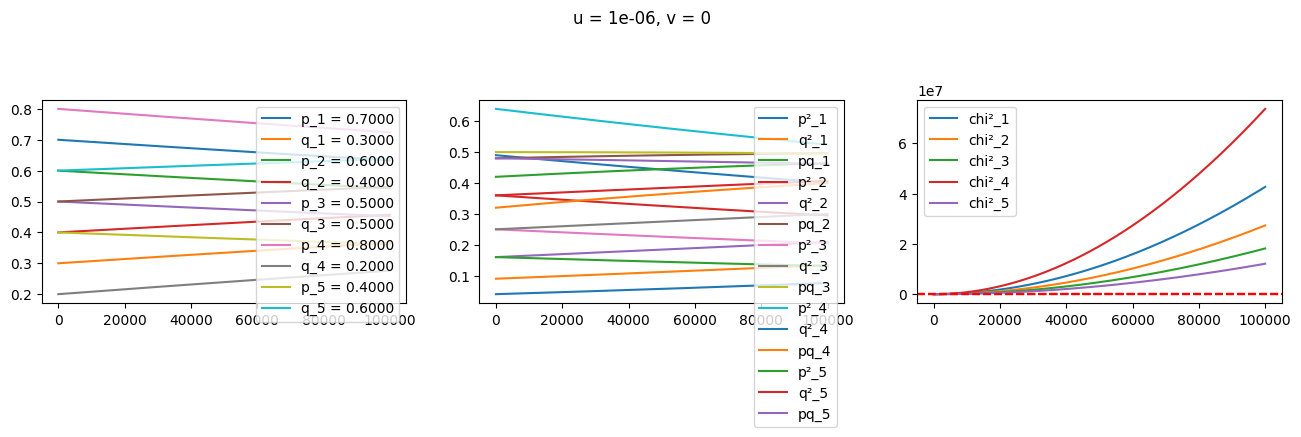

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 0.25751689640673875, Final q: 0.7424831035952824


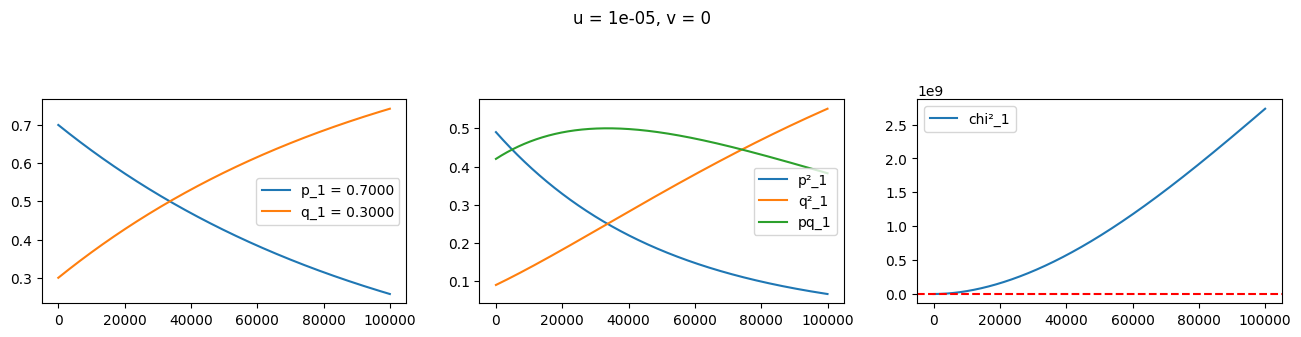

 p inicial, 0.6, q inicial, 0.4
Final p: 0.22072876834863087, Final q: 0.7792712316530929


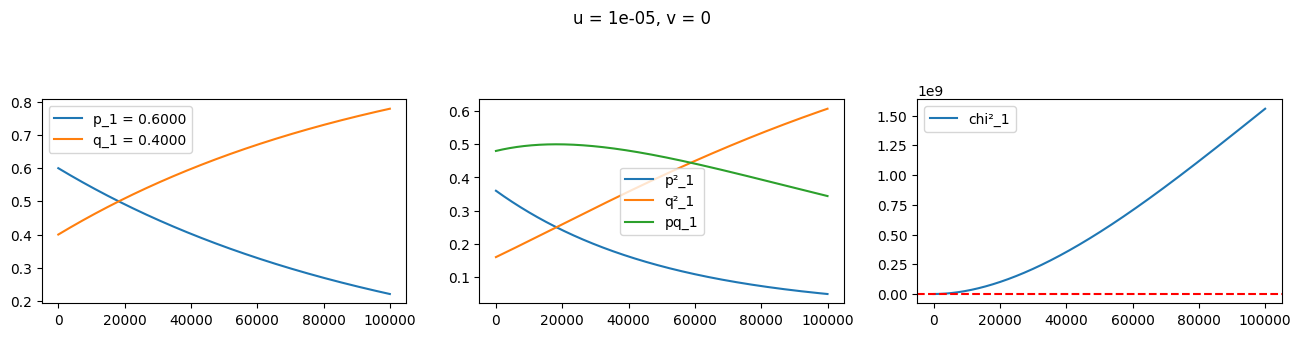

 p inicial, 0.5, q inicial, 0.5
Final p: 0.18394064029052698, Final q: 0.8160593597109008


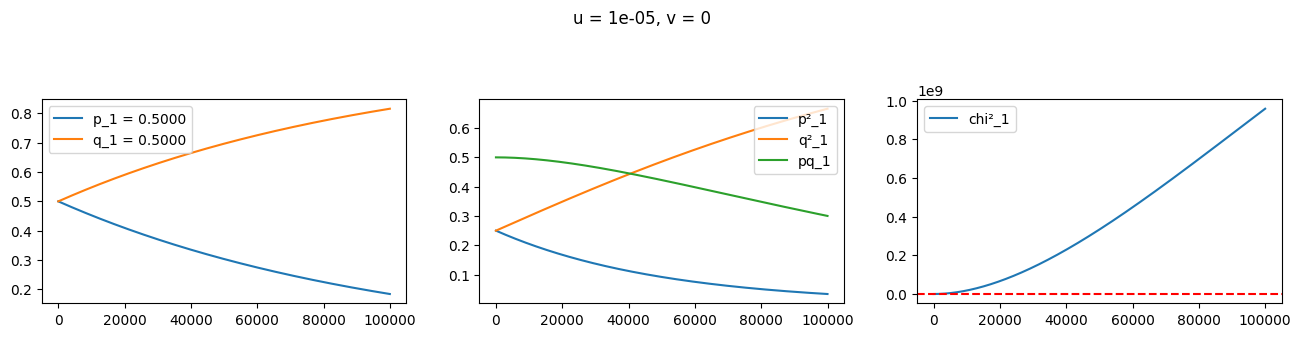

 p inicial, 0.8, q inicial, 0.19999999999999996
Final p: 0.29430502446484424, Final q: 0.7056949755374639


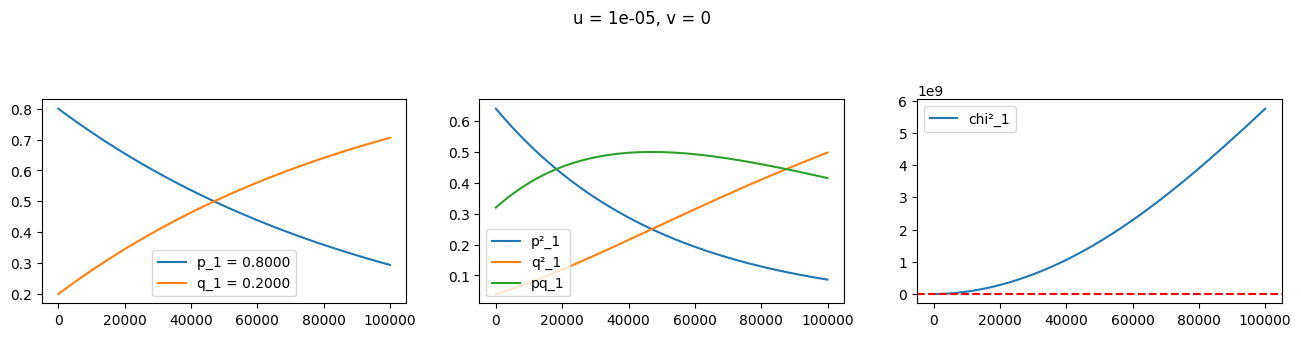

 p inicial, 0.4, q inicial, 0.6
Final p: 0.14715251223242212, Final q: 0.8528474877687453


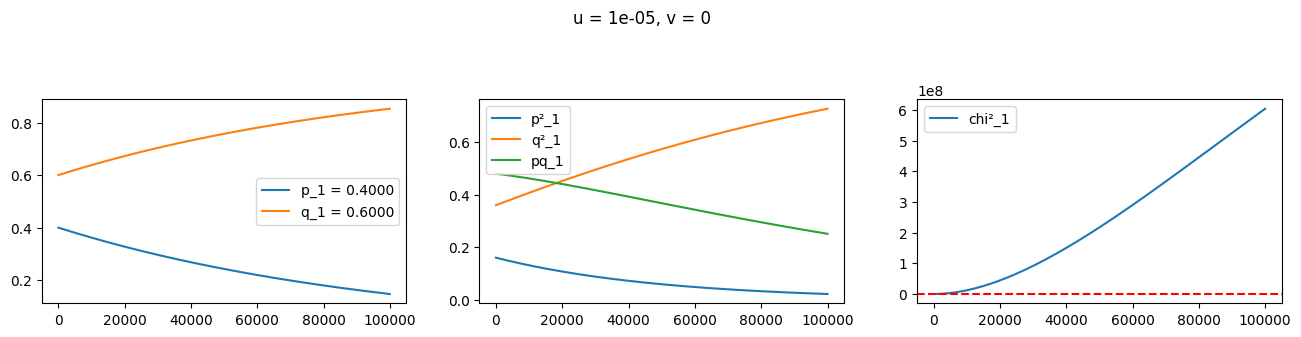

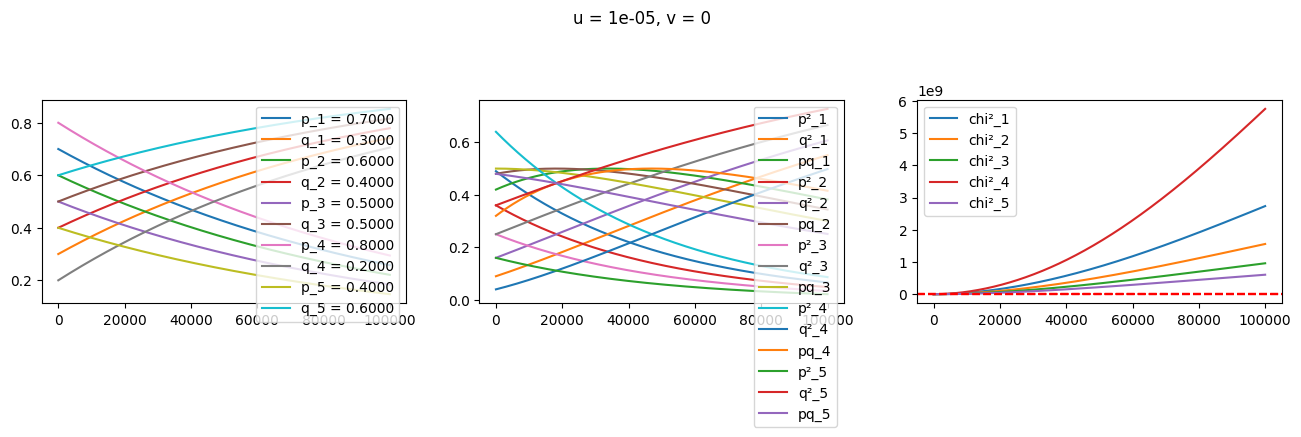

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 3.176724049535759e-05, Final q: 0.9999682327595859


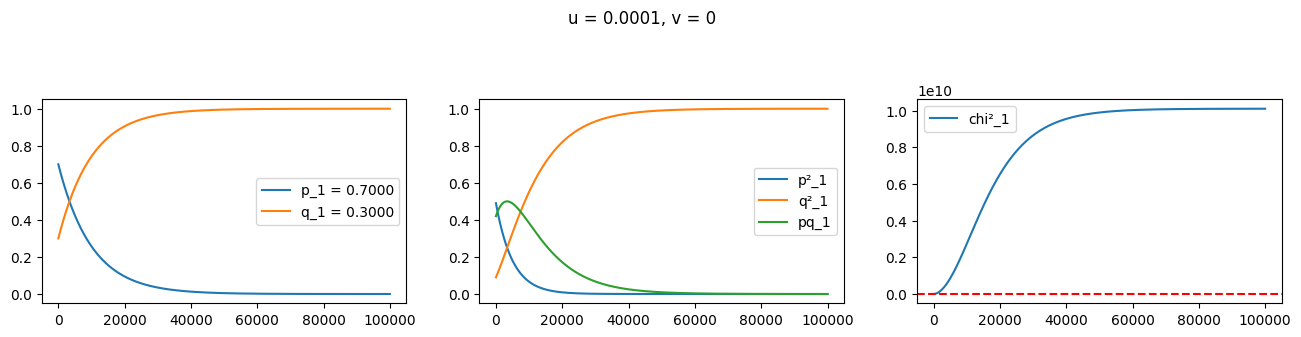

 p inicial, 0.6, q inicial, 0.4
Final p: 2.72290632817349e-05, Final q: 0.9999727709367795


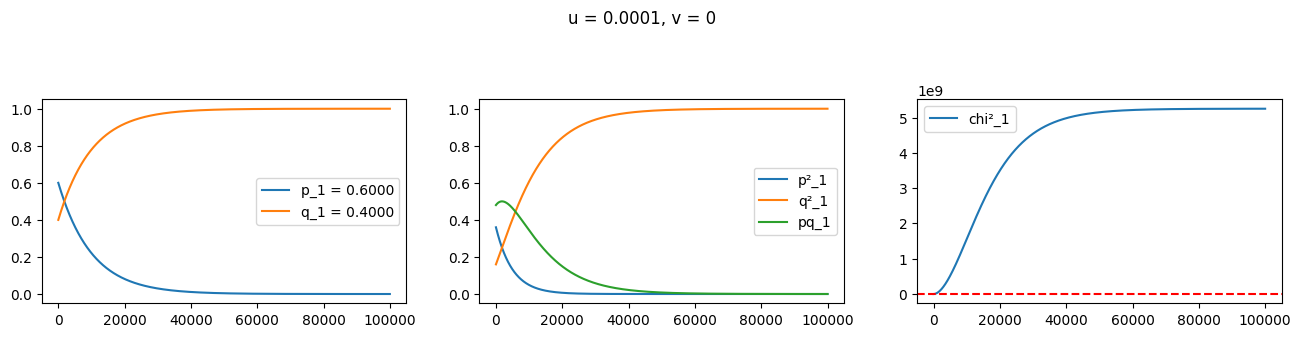

 p inicial, 0.5, q inicial, 0.5
Final p: 2.2690886068111625e-05, Final q: 0.9999773091139983


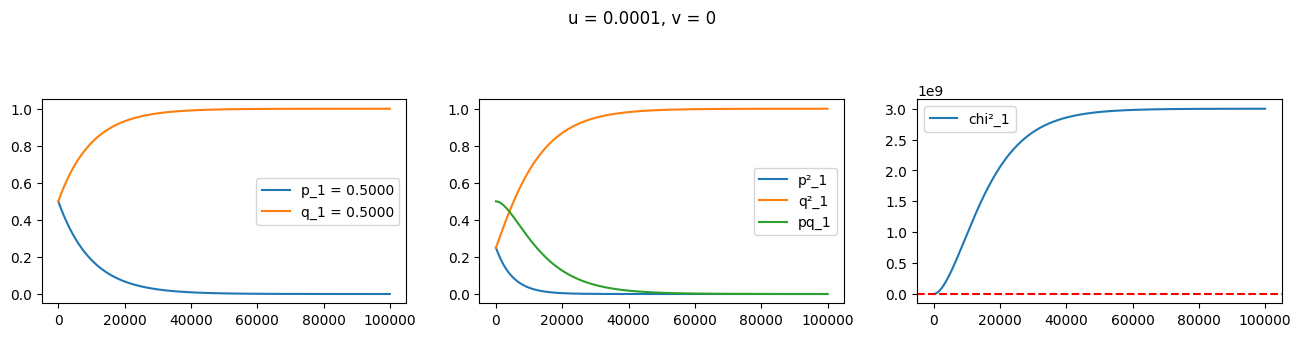

 p inicial, 0.8, q inicial, 0.19999999999999996
Final p: 3.630541770897993e-05, Final q: 0.9999636945823911


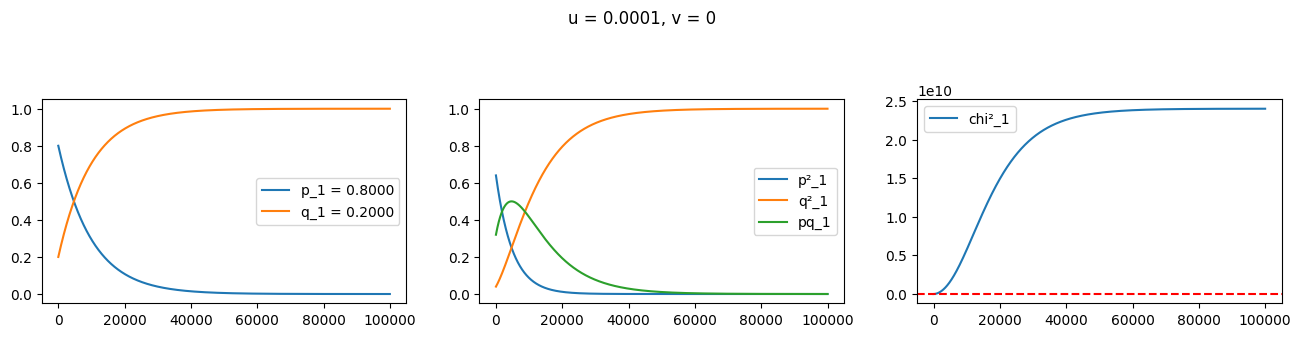

 p inicial, 0.4, q inicial, 0.6
Final p: 1.8152708854489966e-05, Final q: 0.999981847291179


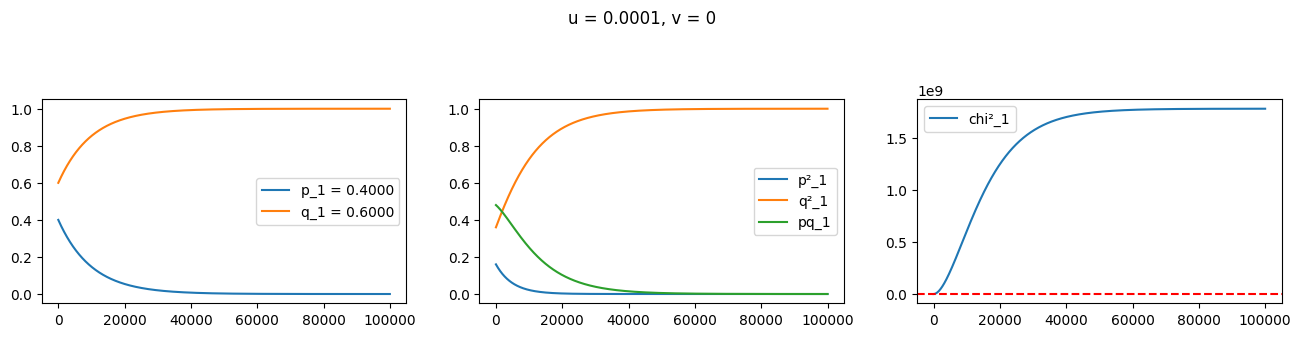

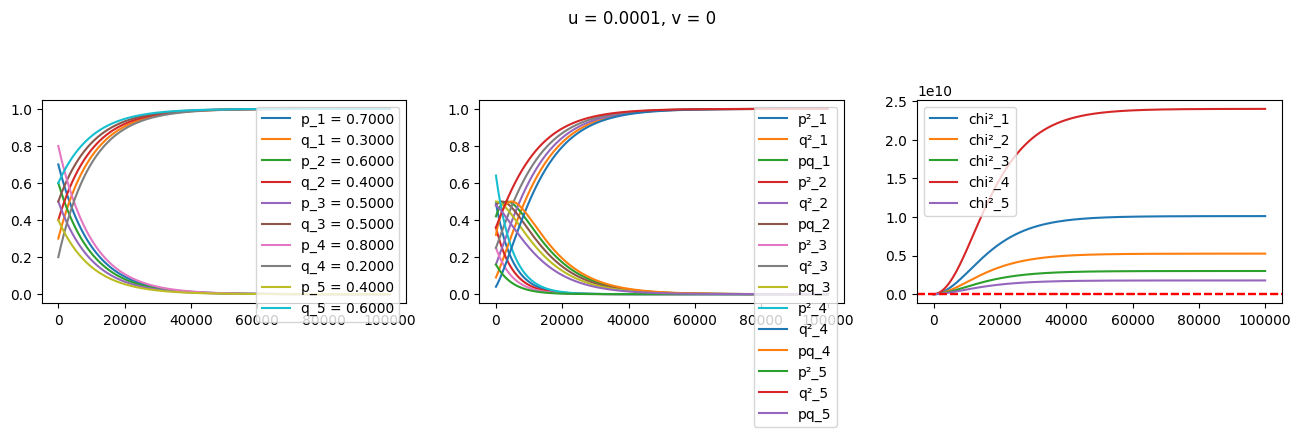

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 2.4794488306708057e-44, Final q: 0.999999999999962


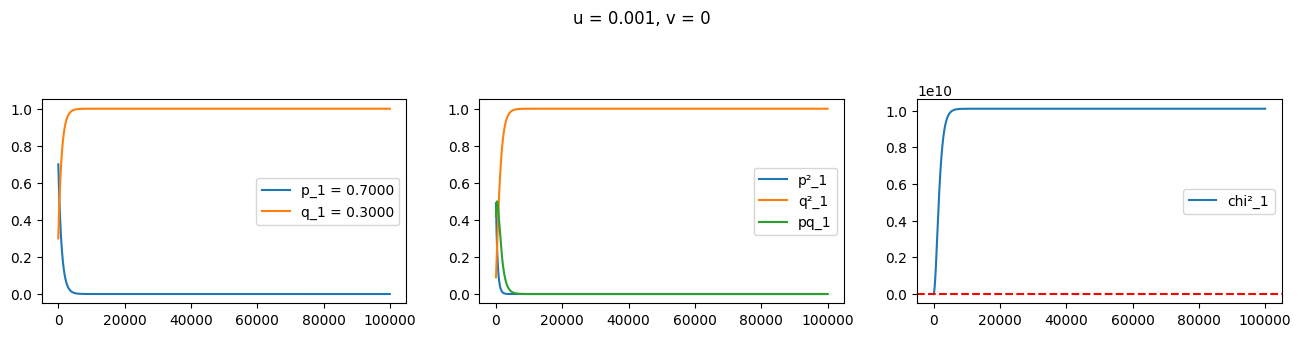

 p inicial, 0.6, q inicial, 0.4
Final p: 2.1252418548607512e-44, Final q: 0.9999999999999611


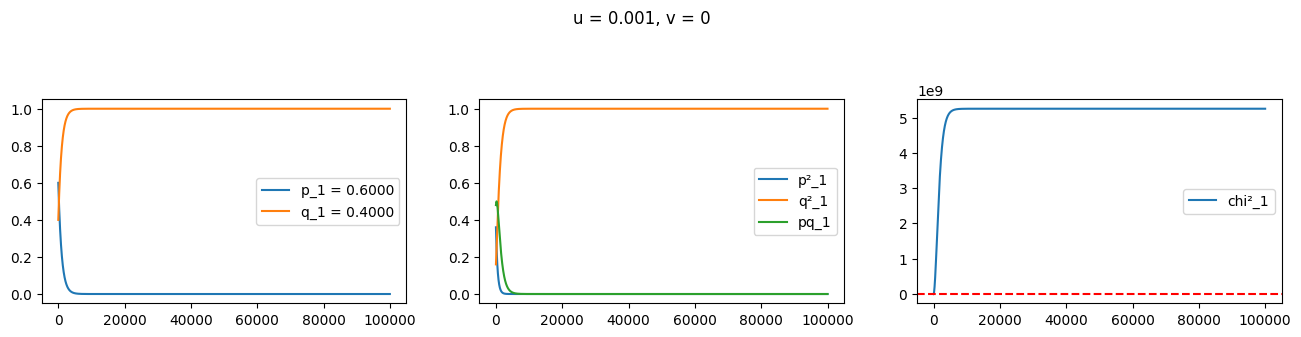

 p inicial, 0.5, q inicial, 0.5
Final p: 1.7710348790506176e-44, Final q: 0.9999999999999607


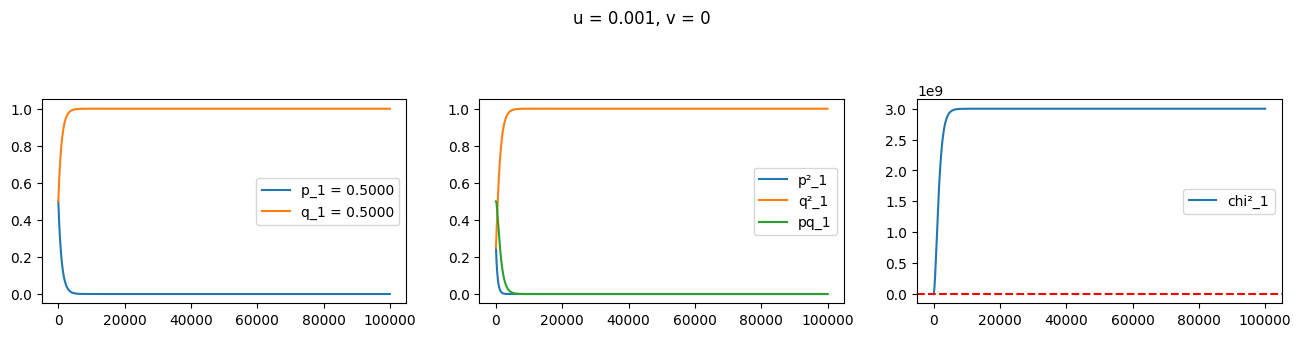

 p inicial, 0.8, q inicial, 0.19999999999999996
Final p: 2.8336558064809824e-44, Final q: 0.9999999999999636


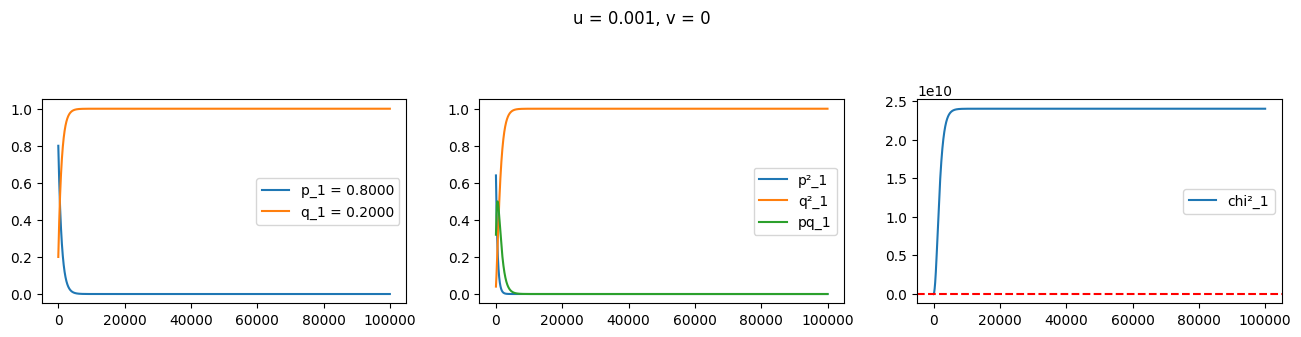

 p inicial, 0.4, q inicial, 0.6
Final p: 1.4168279032404912e-44, Final q: 0.9999999999999644


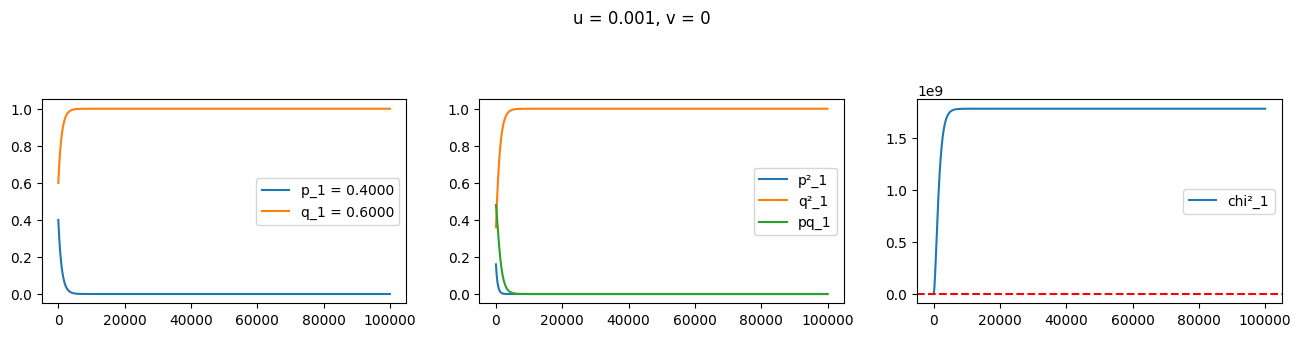

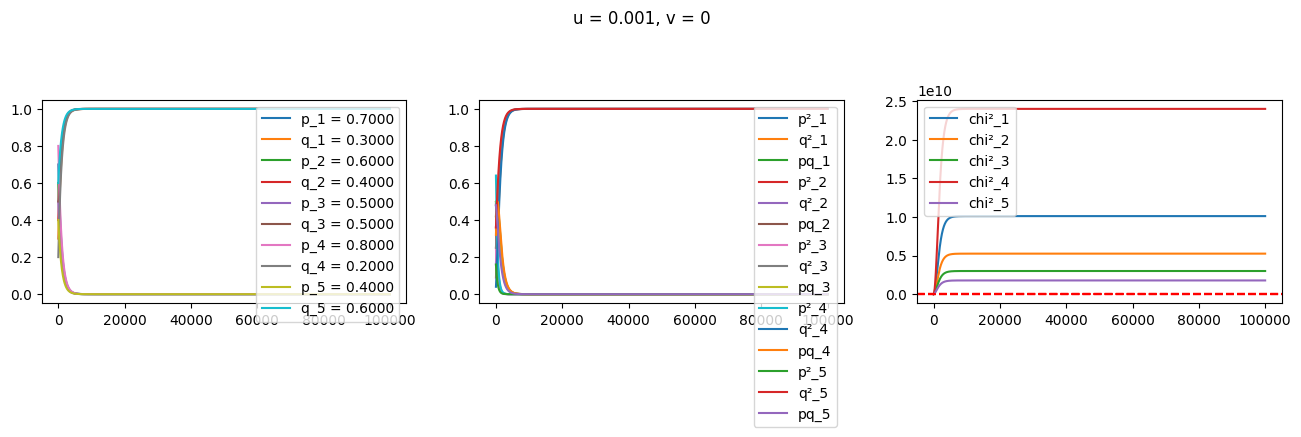

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 2.4e-322, Final q: 0.9999999999999971


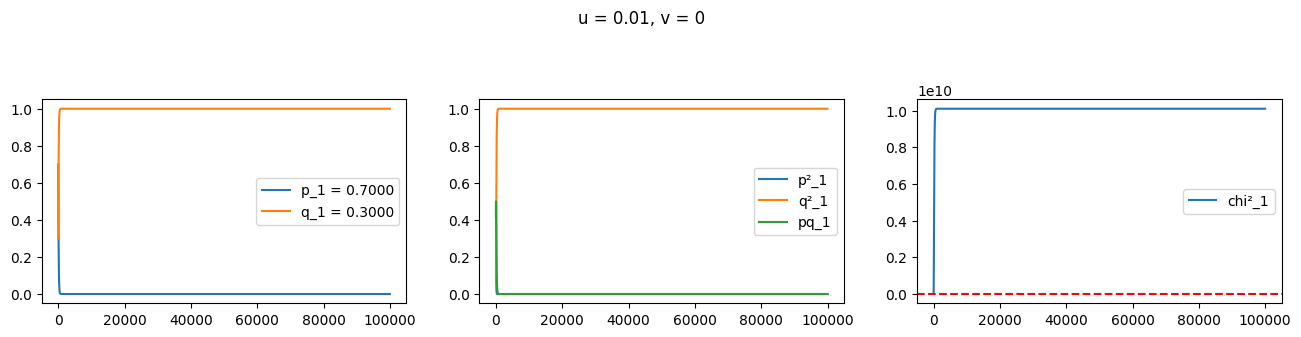

 p inicial, 0.6, q inicial, 0.4
Final p: 2.4e-322, Final q: 0.9999999999999959


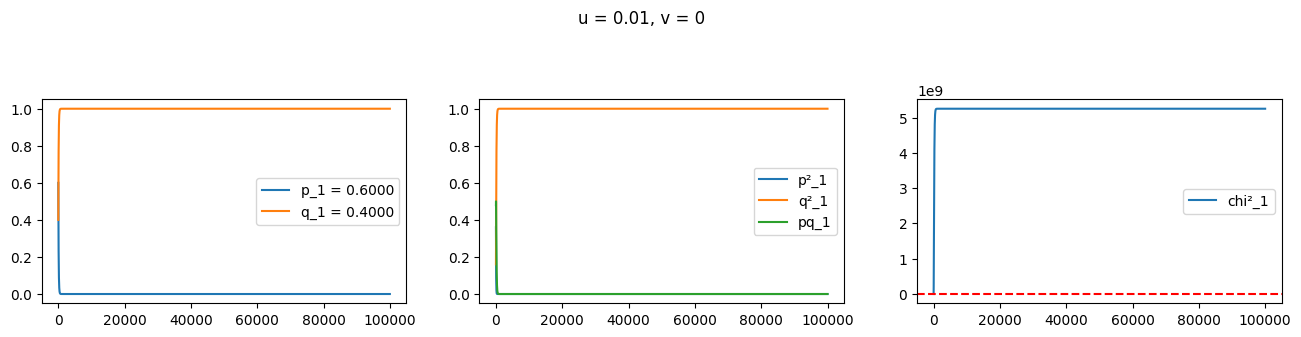

 p inicial, 0.5, q inicial, 0.5
Final p: 2.4e-322, Final q: 0.9999999999999962


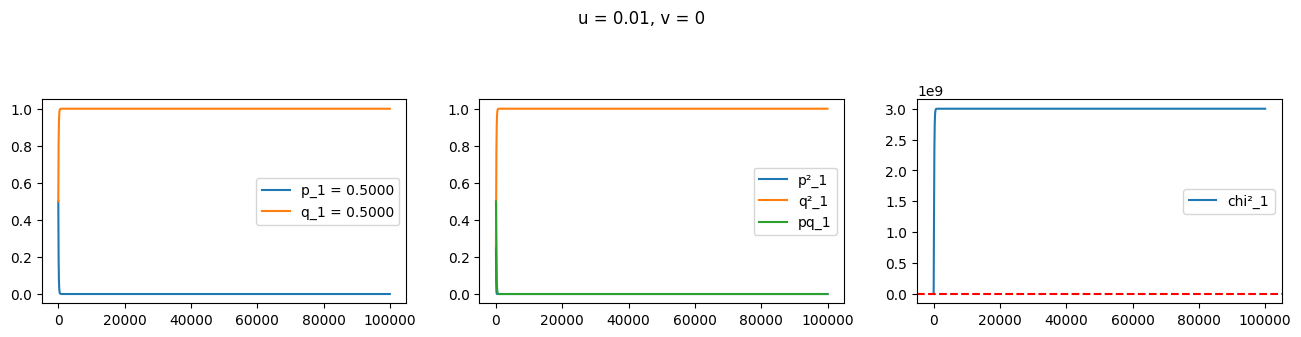

 p inicial, 0.8, q inicial, 0.19999999999999996
Final p: 2.4e-322, Final q: 0.999999999999998


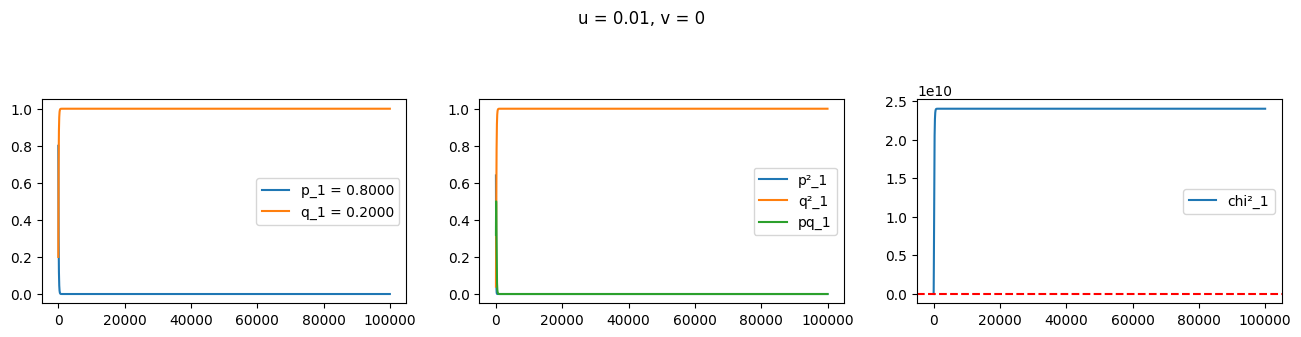

 p inicial, 0.4, q inicial, 0.6
Final p: 2.4e-322, Final q: 0.9999999999999937


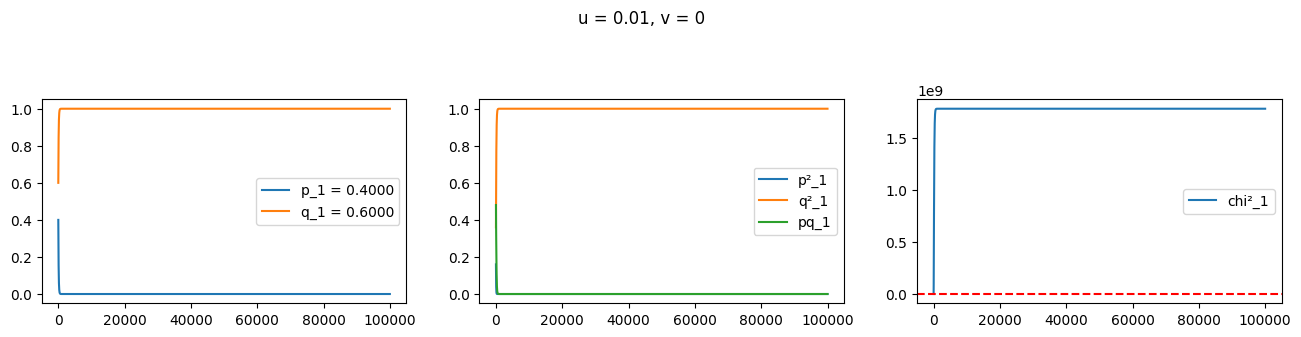

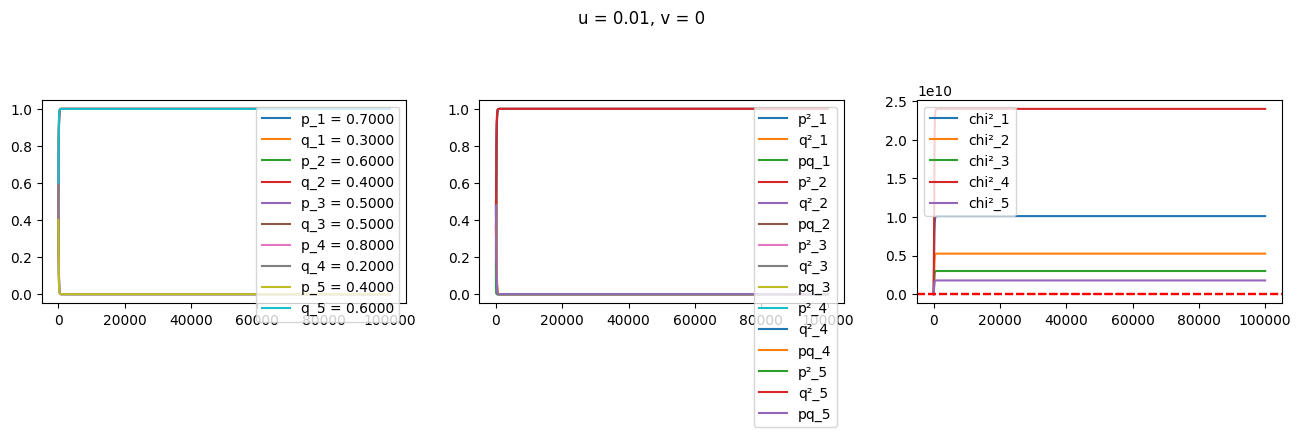

In [6]:
u_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
v_list = [0]
p0_list = [0.7, 0.6, 0.5, 0.8, 0.4]
q0_list = [1 - p0 for p0 in p0_list]
# v_list = [1e-4, 1e-3, 1e-2, 1e-1]

t = np.arange(1e5).astype(int)
precision = 10

N = 1e9
n = 1 # Graus de Liberdade

estag_gens = {}
eq_gens = {}
gen_loss = {}
ehw_gens = {}

# EHW é P0 e Q0, por isso, precisamos comparar os valores obtidos com os valores iniciais
# Utilizando o chi squared

for u in u_list:
    for v in v_list:
        p_t_list = []
        q_t_list = []
        p2_t_list = []
        q2_t_list = []
        pq_t_list = []
        chi_squared_list = []
        for k, p0 in enumerate(p0_list):
            q0 = q0_list[k]

            p_t = [p0]
            q_t = [q0]
            p2_t = [p0 ** 2]
            q2_t = [q0 ** 2]
            pq_t = [2 * p0 * q0]
            chi_squared = [0]

            expected = generate_random_samples(p0, q0, N)

            dict_key = f"u={u}, v={v}, Pop={p0:.4f}x{q0:.4f}"
            print(f" p inicial, {p0}, q inicial, {q0}")
            for i in t:
                if i == 0:
                    continue

                p, q = next_generation(p_t[i-1], q_t[i-1], u, v)

                if round(p, precision) == round(q, precision) and not eq_gens.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    eq_gens[dict_key] = i
                
                if round(p, precision) == round(p_t[i-1], precision) and not estag_gens.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    estag_gens[dict_key] = i
                
                p2 = p ** 2
                q2 = q ** 2
                pq = 2 * p * q

                # ehw = p**2 + 2*p*q + (q)**2
                # if ehw != 1:
                #     print(f"Gen {i} Não em EHW")
                
                observed = generate_random_samples(p, q, N)
                chi_2, is_correlated = run_chi_squared_test(observed, expected, n)
                if not is_correlated and not ehw_gens.get(dict_key, None):
                    ehw_gens[dict_key] = i

                # Verify genetic loss
                if int(pq * N) == 0 and not gen_loss.get(dict_key, None):
                    # print(f"Gen {i} p: {p} q: {q}")
                    gen_loss[dict_key] = i
                
                # Add chi squared

                # print(f"Gen {i} p: {p} q: {q}")
                p_t.append(p)
                q_t.append(q)
                p2_t.append(p2)
                q2_t.append(q2)
                pq_t.append(pq)
                chi_squared.append(chi_2)
            
            p_t_list.append(p_t)
            q_t_list.append(q_t)
            p2_t_list.append(p2_t)
            q2_t_list.append(q2_t)
            pq_t_list.append(pq_t)
            chi_squared_list.append(chi_squared)


            print(f"Final p: {p_t[-1]}, Final q: {q_t[-1]}")
            plot_all(t, [p_t], [q_t], [p2_t], [q2_t], [pq_t], [chi_squared], [p0], [q0], u, v)
        # plot_n_pt(t, p_t_list, p0_list, u, v)

        plot_all(t, p_t_list, q_t_list, p2_t_list, q2_t_list, pq_t_list, chi_squared_list, p0_list, q0_list, u, v)
        # For each p value do the plot in a subplot
        # plot_n_pt_qt(t, p_t_list, q_t_list, p0_list, q0_list, u, v)
        # plot_n_p2_q2_pq(t, p2_t_list, q2_t_list, pq_t_list, p0_list, q0_list, u, v)

        # plot_pt(t, p_t, p0)
        # plot_pt(t, q_t, q0)

        # plot_pt_qt(t, p_t, q_t, p0, q0)


In [5]:
print("Estagnação")
for key, value in estag_gens.items():
    print(f"Estag Gen {key}: {value}")

print("Equilibrio p=q")
for key, value in eq_gens.items():
    print(f"Eq Gen {key}: {value}")

print("Fim do EHW")
for key, value in ehw_gens.items():
    print(f"EHW Gen {key}: {value}")

print("Perda Genética")
for key, value in gen_loss.items():
    print(f"Gen Loss {key}: {value}")

Estagnação
Estag Gen u=0 Pop=700000000.0: 14949
Estag Gen u=0 Pop=600000000.0: 15220
Estag Gen u=0 Pop=500000000.0: 15441
Estag Gen u=0 Pop=800000000.0: 14516
Estag Gen u=0 Pop=400000000.0: 15609
Equilibrio p=q
Fim do EHW
EHW Gen u=0 Pop=700000000.0: 84
EHW Gen u=0 Pop=600000000.0: 68
EHW Gen u=0 Pop=500000000.0: 55
EHW Gen u=0 Pop=800000000.0: 110
EHW Gen u=0 Pop=400000000.0: 45
Perda Genética
Gen Loss u=0 Pop=700000000.0: 20203
Gen Loss u=0 Pop=600000000.0: 20490
Gen Loss u=0 Pop=500000000.0: 20713
Gen Loss u=0 Pop=800000000.0: 19798
Gen Loss u=0 Pop=400000000.0: 20896


# Respostas:

